# Peer-Graded Network Models

### Part (a)

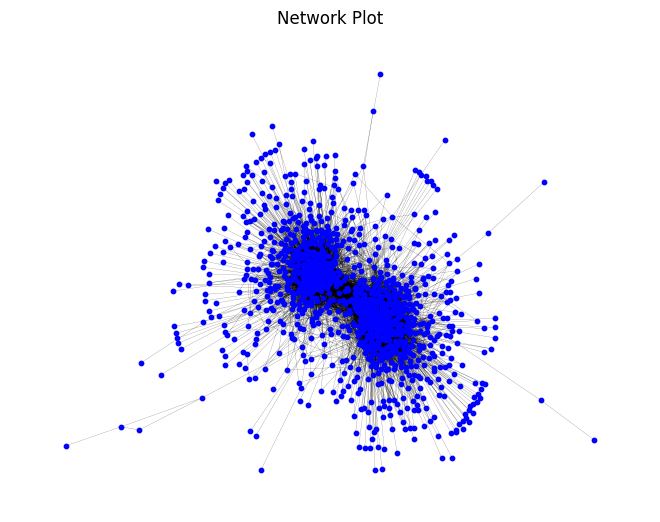

Number of nodes: 1222
Number of edges: 16713


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings; warnings.filterwarnings('ignore')

np.random.seed(1)

# Read in and plot
G = nx.read_edgelist('PoliticalBlogs.txt')
nx.draw(G, with_labels=False, node_size=10, width = 0.1, node_color='blue')
plt.title('Network Plot')
plt.show()

# Get node and edge counts
node_count = G.number_of_nodes()
edge_count = G.number_of_edges()
print("Number of nodes:", node_count)
print("Number of edges:", edge_count)

There are 1,222 nodes and 16,713 edges.

### Part (b)

Nodes per cluster:
{0: 1216, 1: 6}


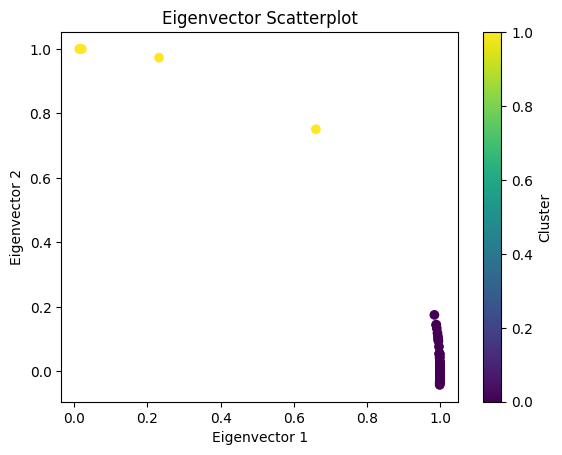

In [2]:

# Collect adjacency matrix and convert to numpy array
A = nx.adjacency_matrix(G).toarray()

def spect_clust(regular: bool, network: bool):
    """Perform spectral clustering. Serves as master function for this
    and all subsequent parts.
    
    Use/don't use regularization based on first parameter, output scatterplot/network 
    based on second parameter"""
    
    # Calculate the D and L matrices
    if regular:
        tau = 2*edge_count / node_count
        D = np.squeeze(np.asarray(np.sum(A,axis = 1))) + tau
    else:
        D = np.squeeze(np.asarray(np.sum(A,axis = 1)))
    L = np.diag(D) - A
    D = np.diag(D**(-0.5))
    L = D @ L @ D

    # Find eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(L)

    # Collect matrix Y and normalize
    Y = eigenvectors[:,0:2]
    Y = np.transpose(np.transpose(Y)/np.linalg.norm(Y,axis = 1))

    # Perform K-Means on rows of Y and plot
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(Y)
    labels = kmeans.labels_

    if network:
        # Assign cluster labels to nodes
        for node, label in zip(G.nodes(), labels):
            G.nodes[node]['cluster'] = label
        # Get cluster labels
        node_colors = [G.nodes[node]['cluster'] for node in G.nodes()]
        # Plot nodes colored by cluster
        nx.draw(G, with_labels=False, node_size=10, width=0.1, node_color=node_colors, cmap='viridis')
        plt.title('Clustered Network Plot')
        plt.show()
    else:
        cluster_counts = {}
        for label in labels:
            if label not in cluster_counts:
                cluster_counts[label] = 1
            else:
                cluster_counts[label] += 1
        print(f'Nodes per cluster:\n{cluster_counts}')
        # Plot the scatterplot
        plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap='viridis')
        plt.xlabel('Eigenvector 1')
        plt.ylabel('Eigenvector 2')
        plt.title('Eigenvector Scatterplot')
        plt.colorbar(label='Cluster')
        plt.show()

spect_clust(regular=False, network=False)

There are 816 nodes in one cluster, and 406 nodes in the other cluster.

### Part (c)

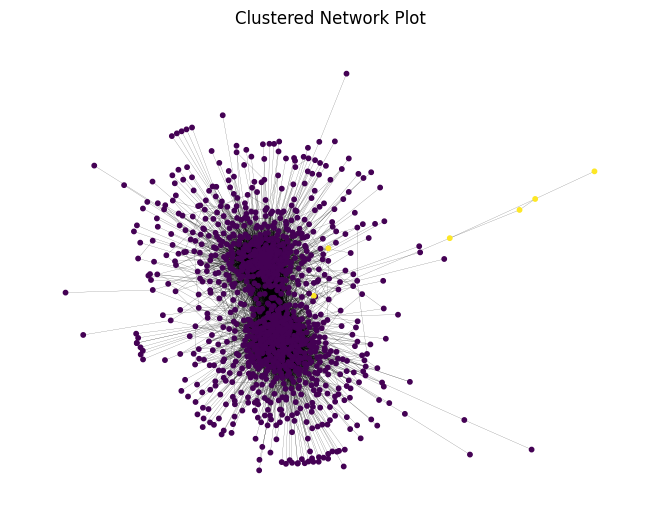

In [3]:
spect_clust(regular=False, network=True)


### Part (d)

Nodes per cluster:
{1: 552, 0: 670}


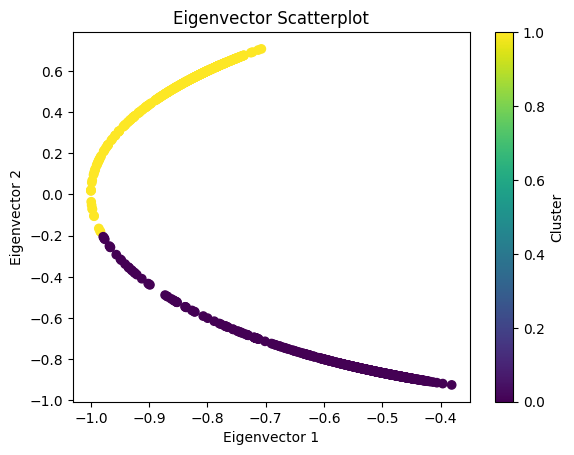

In [4]:
spect_clust(regular=True, network=False)

There are 552 nodes in one cluster, and 670 nodes in the other.

### Part (e)

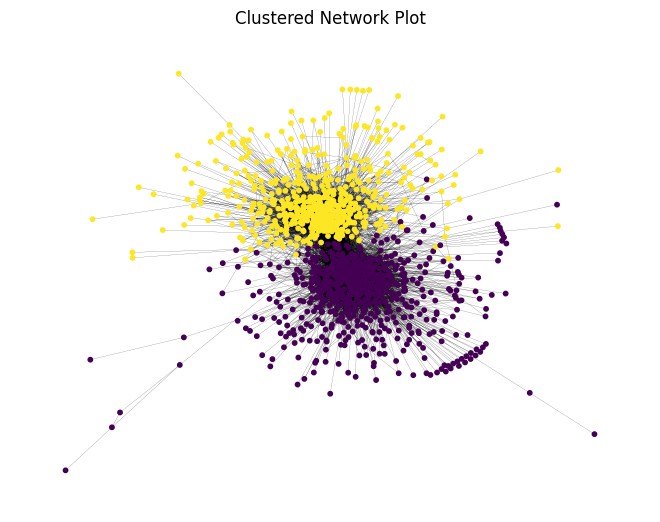

In [5]:
spect_clust(regular=True, network=True)

This method seems to cluster the nodes quite accurately. It clusters much more accurately than the previous method.